In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt


# List of folders to search in
file_name = "0.04"  # Replace with your file name
folders = [
    "M=32",
    "M=45",
    "M=64",
    "M=91",
    "M=128",
    "M=181",
    "M=256",
    "M=362",
    "M=1024",
    "M=inf",
]

found_files = []
for folder in folders:
    file_path = os.path.join(folder, file_name + ".npy")
    if os.path.isfile(file_path):
        found_files.append(file_path)

# Print the paths of found files
M_list = []
print("Found files:")
for file in found_files:
    print(file)
    data = np.load(file)
    M_list.append(data)
print(M_list[0].shape)

Found files:
M=32\0.04.npy
M=45\0.04.npy
M=64\0.04.npy
M=91\0.04.npy
M=128\0.04.npy
M=181\0.04.npy
M=256\0.04.npy
M=362\0.04.npy
M=1024\0.04.npy
M=inf\0.04.npy
(2, 1216)


['M=32', 'M=45', 'M=64', 'M=91', 'M=128', 'M=181', 'M=256', 'M=362', 'M=1024', 'M=inf']


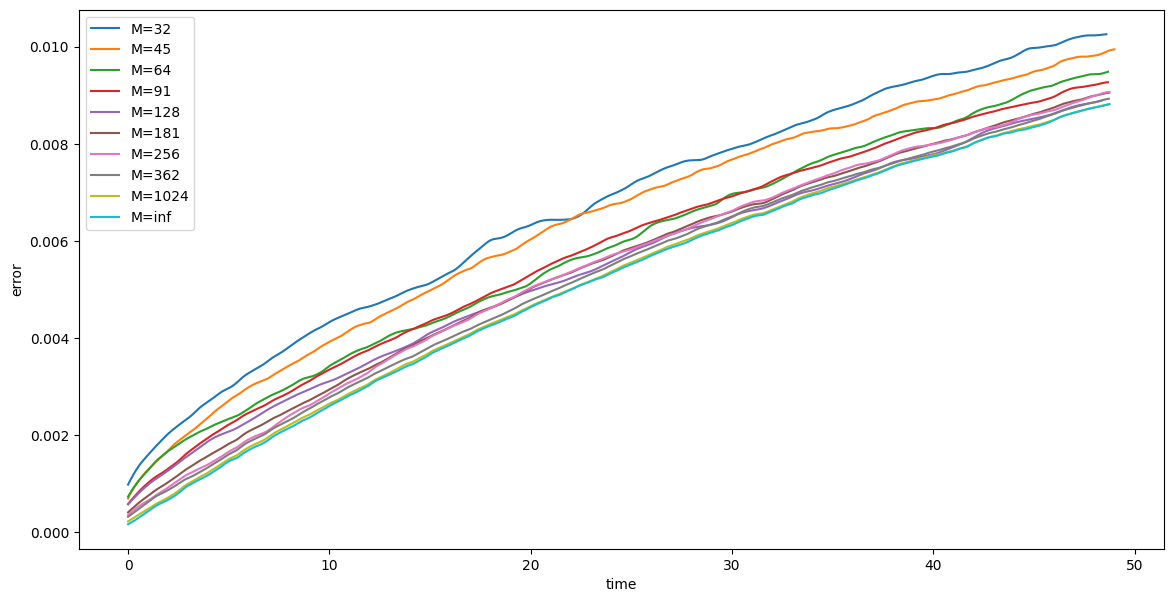

In [30]:
plt.rcParams["figure.figsize"] = (14, 7)

for m in M_list:
    plt.plot(m[0], m[1])
print(folders)
plt.legend(folders)
plt.xlabel("time")
plt.ylabel("error")
plt.show()

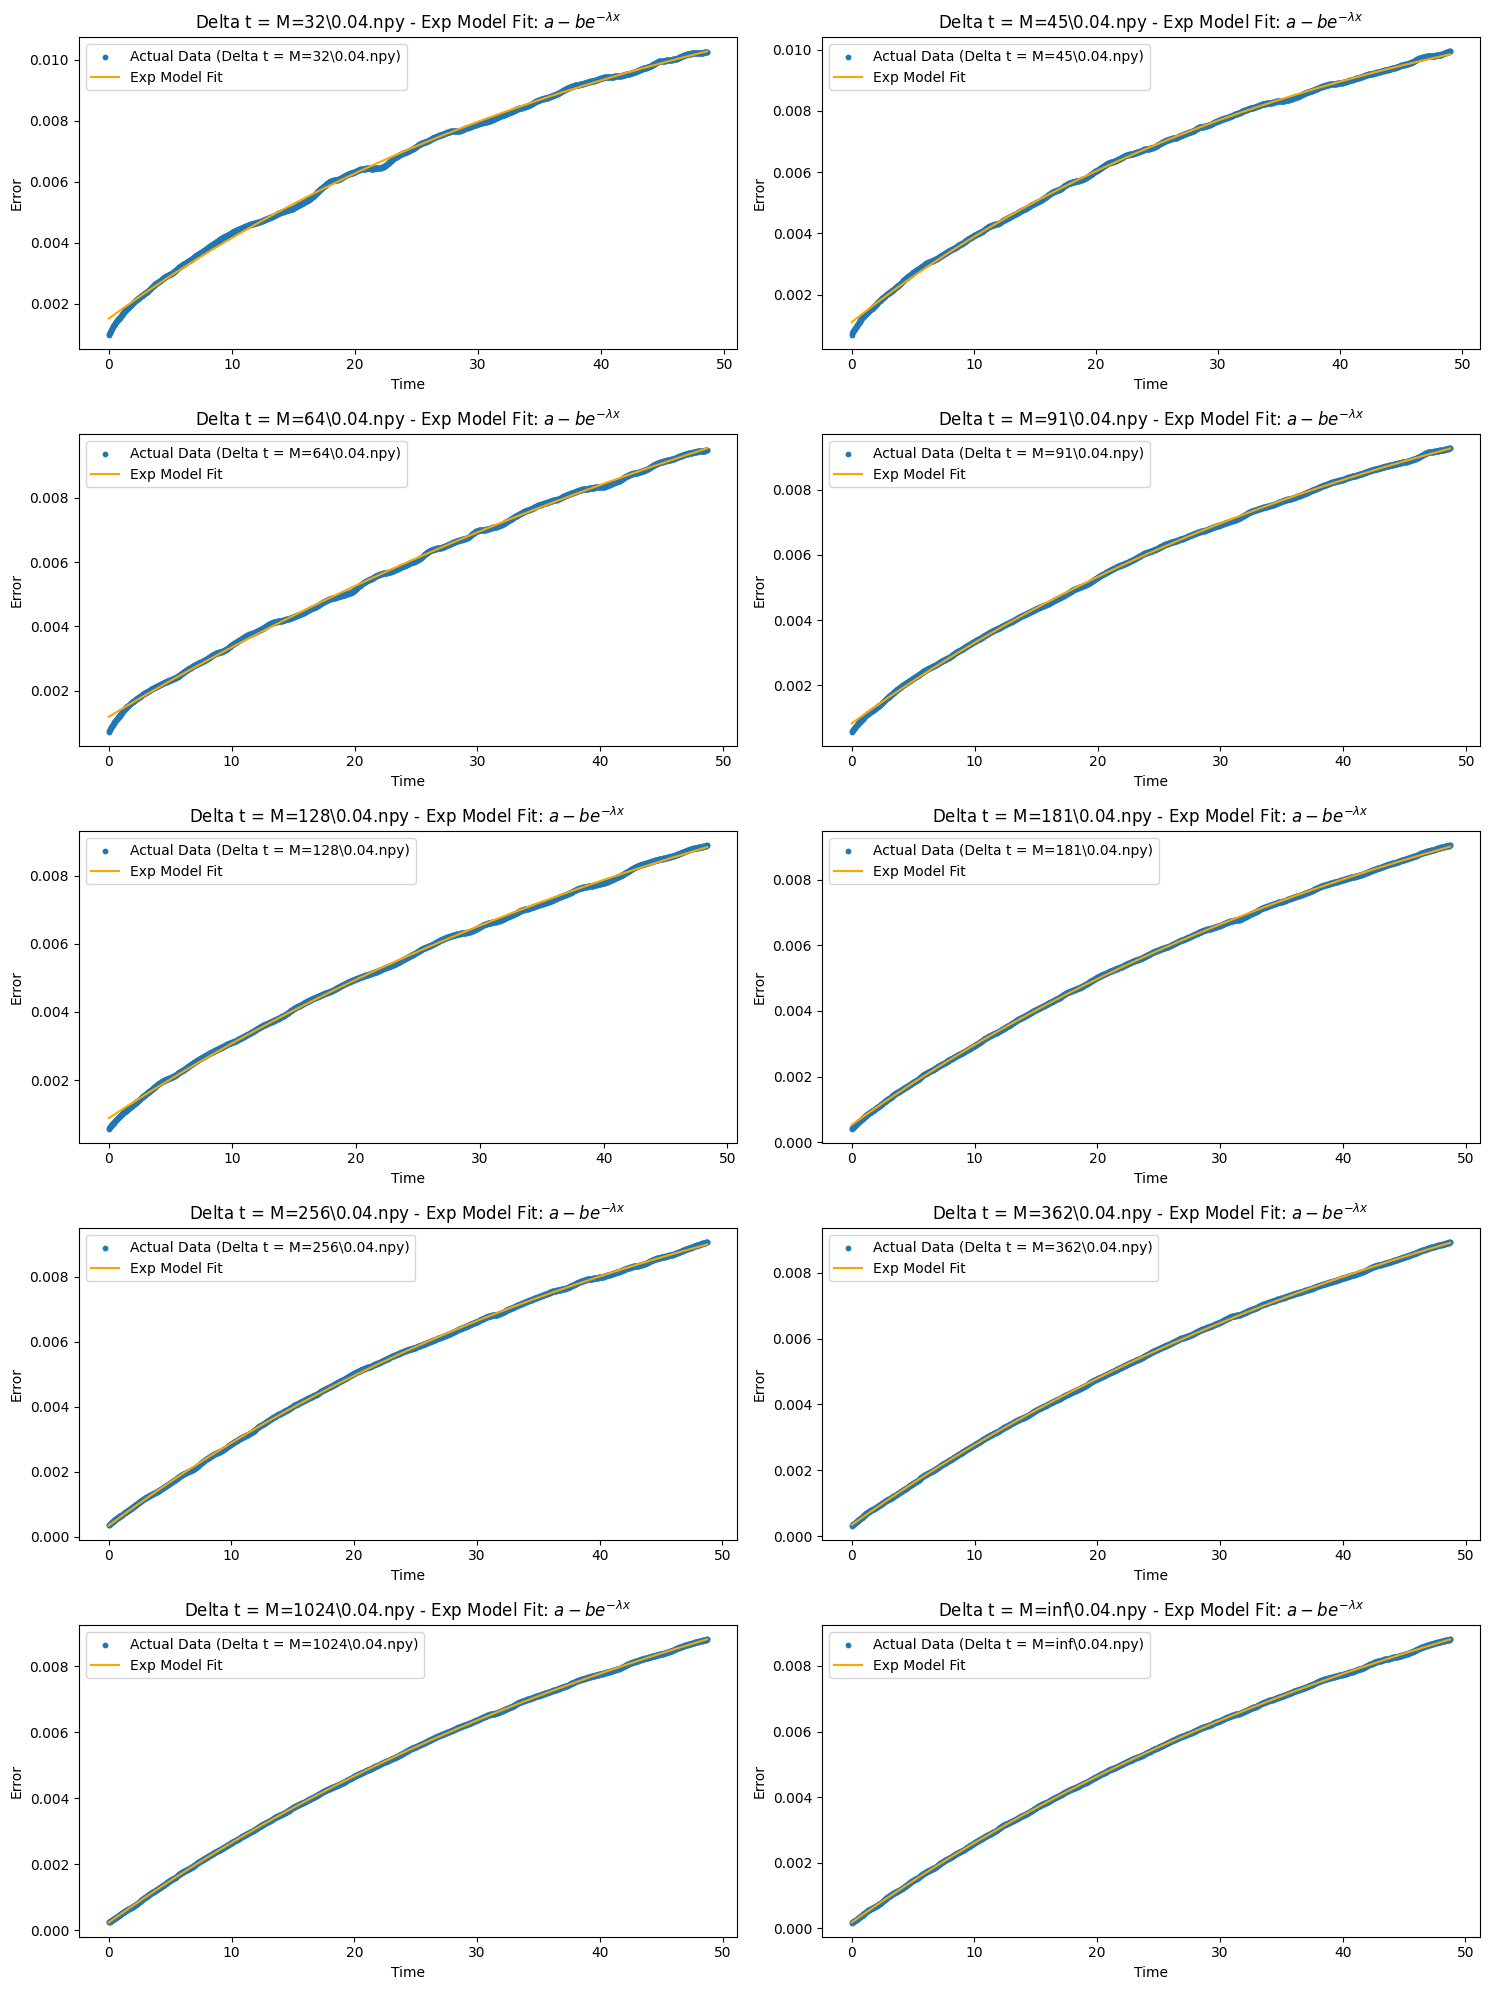

M=32\0.04.npy: a=0.014792518567573886, b=0.013283405453841357, c=0.022215153282537453
R2=0.9984738300431159, MSE=9.63054741147027e-09
M=45\0.04.npy: a=0.013214826787992778, b=0.012110863103338507, c=0.02611463132605769
R2=0.9994010151987669, MSE=3.723658762833292e-09
M=64\0.04.npy: a=0.01927117245730386, b=0.01807318088192496, c=0.01269453167607225
R2=0.9990905905307221, MSE=5.240305745999776e-09
M=91\0.04.npy: a=0.014178271498248773, b=0.013341451147555002, c=0.020498620803045525
R2=0.9996570481113327, MSE=1.9989007508076484e-09
M=128\0.04.npy: a=0.015323784861706213, b=0.014441585375766227, c=0.01653915786583115
R2=0.999279200769431, MSE=3.767085635670561e-09
M=181\0.04.npy: a=0.014506197673557061, b=0.01397897723741836, c=0.019163141571965123
R2=0.9998674537009705, MSE=7.850936957060895e-10
M=256\0.04.npy: a=0.01397467555653452, b=0.013624603098946753, c=0.020672706407027907
R2=0.9998084245469485, MSE=1.1776792143396333e-09
M=362\0.04.npy: a=0.014895299925484844, b=0.014552823689167

<Figure size 1400x700 with 0 Axes>

In [31]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error


# Define the square root model function
def exp_model(x, a, b, lmbda):
    return a - b * np.exp(-lmbda * x)


# List of delta_t values
# delta_ts = t_list

# Load the data from .npy files and store in a dictionary with delta_t as keys
data_dict = {}
for file in found_files:
    data = np.load(file, allow_pickle=True)
    data_dict[file] = {"x_coordinates": data[0], "y_coordinates": data[1]}

# for delta_t in delta_ts:
#     delta_t = round(delta_t, 4)
#     file_path = f"{delta_t}.npy"
#     data = np.load(file_path, allow_pickle=True)
#     data_dict[delta_t] = {"x_coordinates": data[0], "y_coordinates": data[1]}

# Fit the square root model to each dataset and calculate the performance metrics
exp_model_fits = {}
for file, data in data_dict.items():
    # Fit the square root model
    exp_params, _ = curve_fit(exp_model, data["x_coordinates"], data["y_coordinates"])

    # Calculate performance
    y_pred = exp_model(data["x_coordinates"], *exp_params)
    r2 = r2_score(data["y_coordinates"], y_pred)
    mse = mean_squared_error(data["y_coordinates"], y_pred)

    # Store the results
    exp_model_fits[file] = {
        "exp_params": exp_params,
        "performance": {"R2": r2, "MSE": mse},
    }
# for delta_t, data in data_dict.items():
#     # Fit the square root model
#     exp_params, _ = curve_fit(exp_model, data["x_coordinates"], data["y_coordinates"])

#     # Calculate performance
#     y_pred = exp_model(data["x_coordinates"], *exp_params)
#     r2 = r2_score(data["y_coordinates"], y_pred)
#     mse = mean_squared_error(data["y_coordinates"], y_pred)

#     # Store the results
#     exp_model_fits[delta_t] = {
#         "exp_params": exp_params,
#         "performance": {"R2": r2, "MSE": mse},
#     }

# Plotting the actual data and the fitted models for each delta_t
plt.figure(figsize=(15, 20))
for i, (file, data) in enumerate(data_dict.items()):
    # Generate a range of x values for plotting the fitted model
    x_range = np.linspace(min(data["x_coordinates"]), max(data["x_coordinates"]), 500)
    # Generate the predicted y values using the fitted square root model
    y_pred = exp_model(x_range, *exp_model_fits[file]["exp_params"])

    # Subplot for each delta_t
    plt.subplot(len(data_dict) // 2 + len(data_dict) % 2, 2, i + 1)
    plt.scatter(
        data["x_coordinates"],
        data["y_coordinates"],
        s=10,
        label=f"Actual Data (Delta t = {file})",
    )
    plt.plot(x_range, y_pred, color="orange", label="Exp Model Fit")
    plt.title(f"Delta t = {file} - Exp Model Fit: " + r"$a-be^{-\lambda x}$")
    plt.xlabel("Time")
    plt.ylabel("Error")
    plt.legend()
# for i, (delta_t, data) in enumerate(data_dict.items()):
#     # Generate a range of x values for plotting the fitted model
#     x_range = np.linspace(min(data["x_coordinates"]), max(data["x_coordinates"]), 500)
#     # Generate the predicted y values using the fitted square root model
#     y_pred = exp_model(x_range, *exp_model_fits[delta_t]["exp_params"])

#     # Subplot for each delta_t
#     plt.subplot(len(data_dict) // 2 + len(data_dict) % 2, 2, i + 1)
#     plt.scatter(
#         data["x_coordinates"],
#         data["y_coordinates"],
#         s=10,
#         label=f"Actual Data (Delta t = {delta_t})",
#     )
#     plt.plot(x_range, y_pred, color="orange", label="Exp Model Fit")
#     plt.title(f"Delta t = {delta_t} - Exp Model Fit: " + r'$ae^{bx}+c$')
#     plt.xlabel("Time")
#     plt.ylabel("Error")
#     plt.legend()

plt.tight_layout()
plt.show()
plt.savefig("data_fit.png")

a = {}
b = {}
lmbda = {}
for delta_t in exp_model_fits.keys():
    print(
        f'{delta_t}: a={exp_model_fits[delta_t]["exp_params"][0]}, b={exp_model_fits[delta_t]["exp_params"][1]}, c={exp_model_fits[delta_t]["exp_params"][2]}'
    )
    print(
        f'R2={exp_model_fits[delta_t]["performance"]["R2"]}, MSE={exp_model_fits[delta_t]["performance"]["MSE"]}'
    )
    a[delta_t] = exp_model_fits[delta_t]["exp_params"][0]
    b[delta_t] = exp_model_fits[delta_t]["exp_params"][1]
    lmbda[delta_t] = exp_model_fits[delta_t]["exp_params"][2]

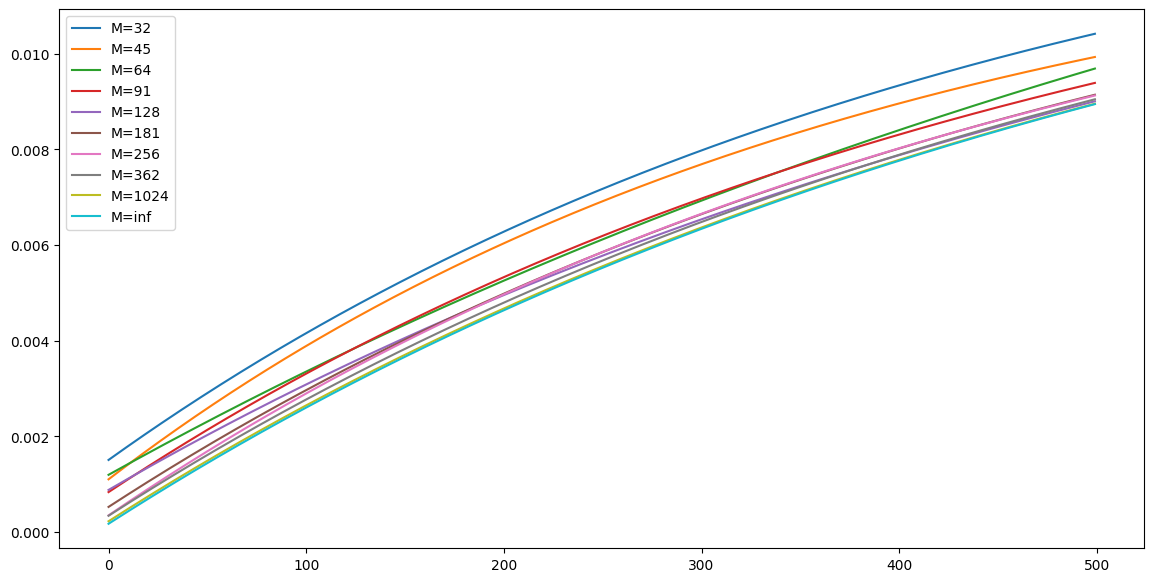

In [32]:
for delta_t in exp_model_fits.keys():
    t = np.linspace(0, 50, 500)
    plt.plot(
        a[delta_t] * np.ones_like(t) - b[delta_t] * np.exp(list(-lmbda[delta_t] * t))
    )
plt.legend(folders)
plt.show()

{'M=32\\0.04.npy': 0.013283405453841357, 'M=45\\0.04.npy': 0.012110863103338507, 'M=64\\0.04.npy': 0.01807318088192496, 'M=91\\0.04.npy': 0.013341451147555002, 'M=128\\0.04.npy': 0.014441585375766227, 'M=181\\0.04.npy': 0.01397897723741836, 'M=256\\0.04.npy': 0.013624603098946753, 'M=362\\0.04.npy': 0.014552823689167044, 'M=1024\\0.04.npy': 0.014765343172495745, 'M=inf\\0.04.npy': 0.014909535853666974}


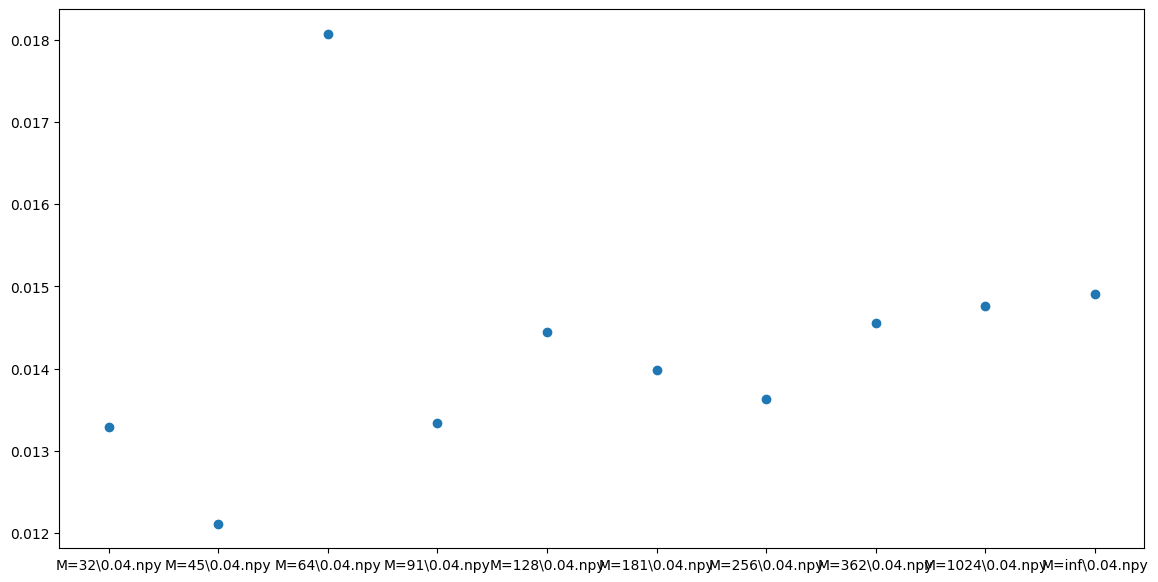

In [33]:
plt.rcParams["figure.figsize"] = (14, 7)
plt.scatter(list(b.keys()), list(b.values()))
print(b)

{'M=32\\0.04.npy': 0.022215153282537453, 'M=45\\0.04.npy': 0.02611463132605769, 'M=64\\0.04.npy': 0.01269453167607225, 'M=91\\0.04.npy': 0.020498620803045525, 'M=128\\0.04.npy': 0.01653915786583115, 'M=181\\0.04.npy': 0.019163141571965123, 'M=256\\0.04.npy': 0.020672706407027907, 'M=362\\0.04.npy': 0.018239292374191935, 'M=1024\\0.04.npy': 0.017888810313668898, 'M=inf\\0.04.npy': 0.017755184764216177}


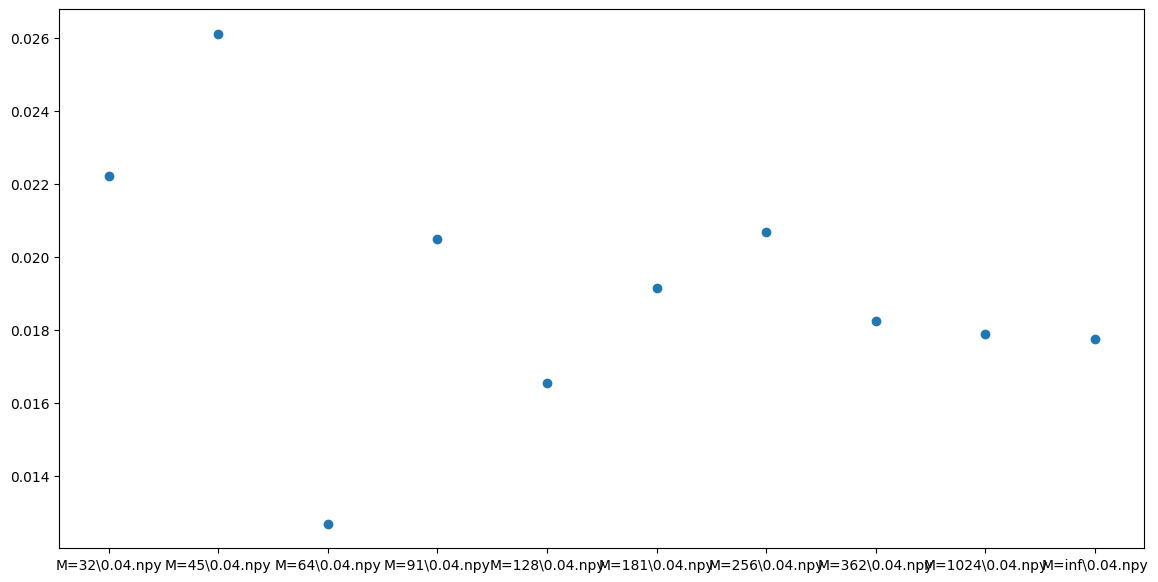

In [34]:
plt.rcParams["figure.figsize"] = (14, 7)
plt.scatter(list(lmbda.keys()), list(lmbda.values()))
print(lmbda)

{'M=32\\0.04.npy': 0.014792518567573886, 'M=45\\0.04.npy': 0.013214826787992778, 'M=64\\0.04.npy': 0.01927117245730386, 'M=91\\0.04.npy': 0.014178271498248773, 'M=128\\0.04.npy': 0.015323784861706213, 'M=181\\0.04.npy': 0.014506197673557061, 'M=256\\0.04.npy': 0.01397467555653452, 'M=362\\0.04.npy': 0.014895299925484844, 'M=1024\\0.04.npy': 0.01499249734452703, 'M=inf\\0.04.npy': 0.015084231275358899}


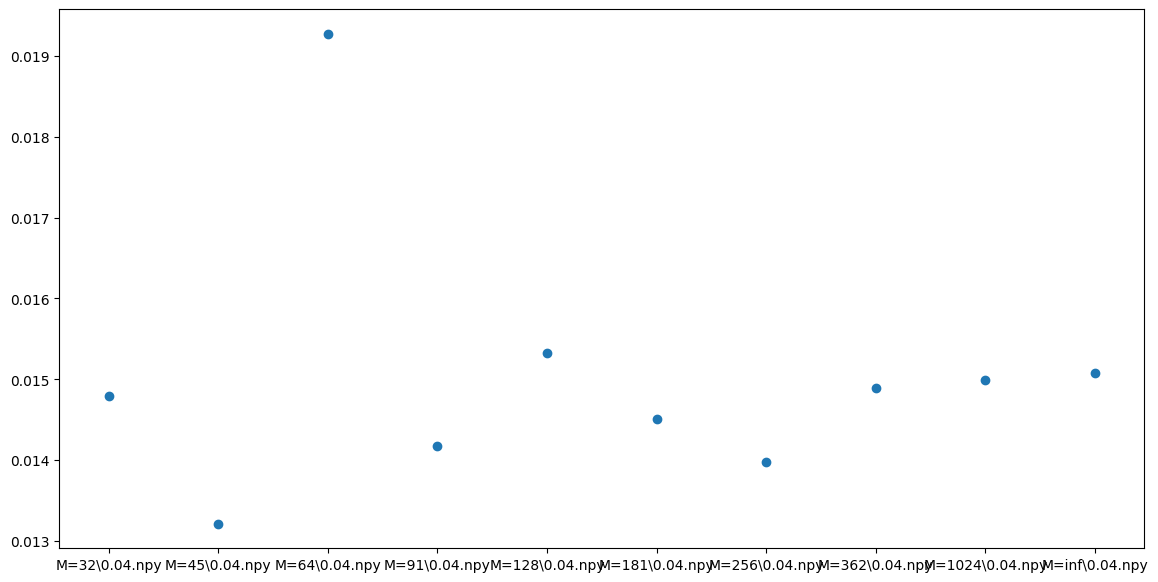

In [35]:
plt.rcParams["figure.figsize"] = (14, 7)
plt.scatter(list(a.keys()), list(a.values()))
print(a)